### Import dataset 

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')

In [87]:
df=pd.read_csv(r"C:\Users\devav\Downloads\scores_data.csv")

In [88]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [90]:
df.describe()

,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


In [91]:
df.shape

(149, 3)

In [92]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [93]:
df.columns=df.columns.str.strip().str.lower()

In [94]:
df.columns

Index(['batch', 'user_id', 'score'], dtype='object')

In [95]:
df.duplicated().sum()

0

In [96]:
df.isna().sum()

batch      0
user_id    0
score      0
dtype: int64

In [97]:
Numerator=df['score'].str.split('/').str[0].astype(int)
Denominator=df['score'].str.split('/').str[-1].astype(int)
df['score_num']=np.divide(Numerator,Denominator)

In [98]:
df

,batch,user_id,score,score_num
0,AI_ELITE_7,uid_149,6 / 7,0.857143
1,AI_ELITE_7,uid_148,6 / 7,0.857143
2,AI_ELITE_7,uid_147,7 / 7,1.000000
3,AI_ELITE_7,uid_146,7 / 7,1.000000
4,AI_ELITE_7,uid_145,4 / 7,0.571429
...,...,...,...,...
144,AI_ELITE_4,uid_5,4 / 7,0.571429
145,AI_ELITE_4,uid_4,4 / 7,0.571429
146,AI_ELITE_4,uid_3,4 / 7,0.571429
147,AI_ELITE_4,uid_2,3 / 7,0.428571


In [99]:
df.dtypes

batch         object
user_id       object
score         object
score_num    float64
dtype: object

### Non Visual Analysis

In [100]:
df["batch"].value_counts()

batch
AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: count, dtype: int64

In [101]:
df["user_id"].value_counts()

user_id
uid_149    1
uid_55     1
uid_53     1
uid_52     1
uid_51     1
          ..
uid_99     1
uid_98     1
uid_97     1
uid_96     1
uid_1      1
Name: count, Length: 149, dtype: int64

In [102]:
df["score"].value_counts()

score
4 / 7    40
5 / 7    32
3 / 7    24
6 / 7    18
7 / 7    18
2 / 7    12
1 / 7     3
0 / 7     2
Name: count, dtype: int64

In [103]:
df["score_num"].value_counts()

score_num
0.571429    40
0.714286    32
0.428571    24
0.857143    18
1.000000    18
0.285714    12
0.142857     3
0.000000     2
Name: count, dtype: int64

In [104]:
df.groupby(["batch"]).sum("score_num")

,score_num
batch,
AI_ELITE_4,26.000000
AI_ELITE_6,29.000000
AI_ELITE_7,38.285714


In [105]:
df.groupby(["batch"]).mean("score_num")

,score_num
batch,
AI_ELITE_4,0.541667
AI_ELITE_6,0.604167
AI_ELITE_7,0.722372


In [106]:
df.groupby(['batch']).max()

,user_id,score,score_num
batch,,,
AI_ELITE_4,uid_9,7 / 7,1.0
AI_ELITE_6,uid_96,7 / 7,1.0
AI_ELITE_7,uid_99,7 / 7,1.0


In [107]:
df.groupby(["batch"]).min()

,user_id,score,score_num
batch,,,
AI_ELITE_4,uid_1,0 / 7,0.000000
AI_ELITE_6,uid_49,0 / 7,0.000000
AI_ELITE_7,uid_100,2 / 7,0.285714


In [108]:
pd.crosstab(index=df['batch'],columns=df['score'],aggfunc=None)

score,0 / 7,1 / 7,2 / 7,3 / 7,4 / 7,5 / 7,6 / 7,7 / 7
batch,,,,,,,,
AI_ELITE_4,1,1,7,8,19,8,1,3
AI_ELITE_6,1,2,3,9,11,13,4,5
AI_ELITE_7,0,0,2,7,10,11,13,10


###  Visual Analysis

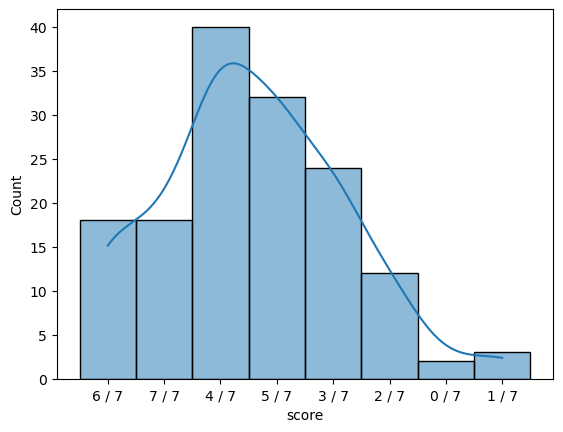

In [109]:
sns.histplot(df['score'],kde=True);

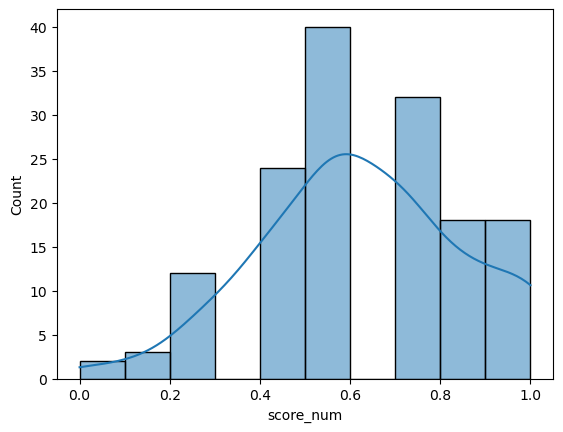

In [110]:
sns.histplot(df['score_num'],kde=True);

<Axes: xlabel='batch', ylabel='count'>

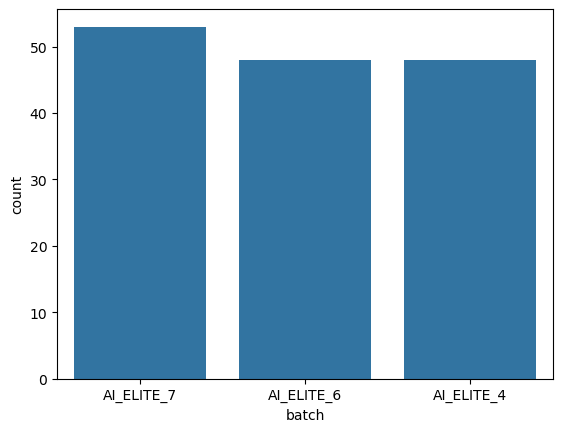

<Axes: xlabel='score', ylabel='count'>

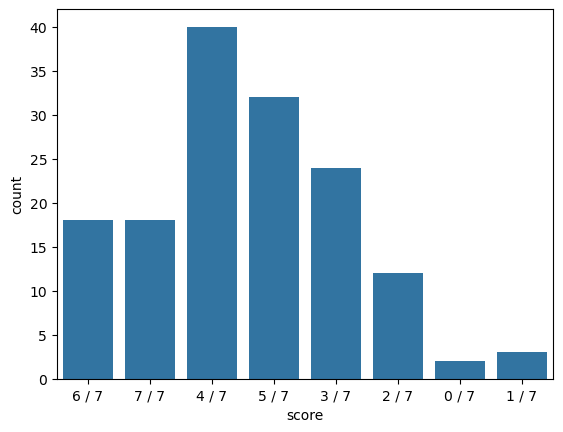

<Axes: xlabel='score_num', ylabel='count'>

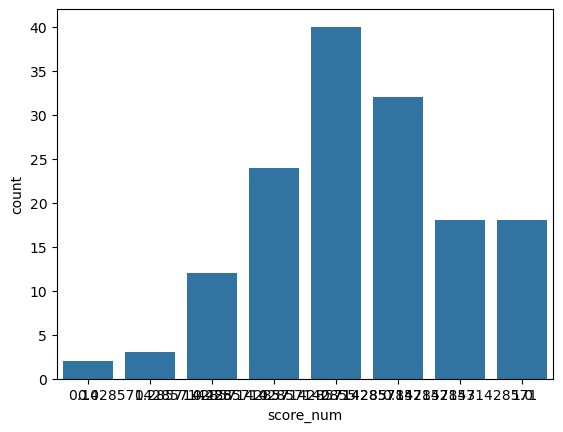

In [111]:

sns.countplot(data=df,x="batch")
plt.show()

sns.countplot(data=df,x="score")
plt.show()


sns.countplot(data=df,x="score_num")
plt.show()


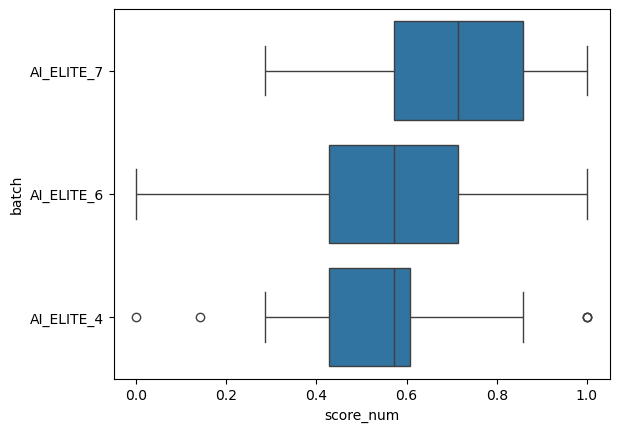

In [112]:
sns.boxplot(data=df,y=df['batch'],x=df['score_num']);

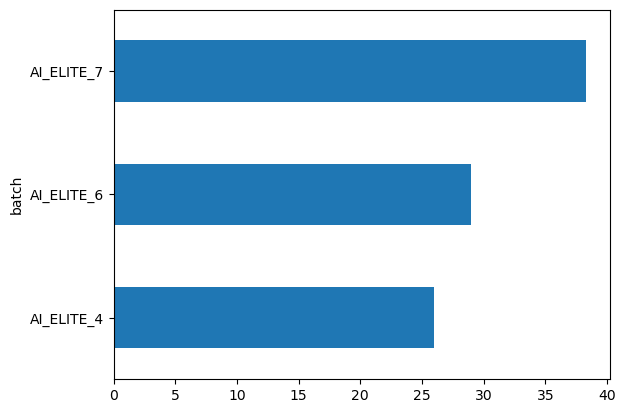

In [113]:
df.groupby(['batch'])['score_num'].agg(sum).plot(kind='barh');

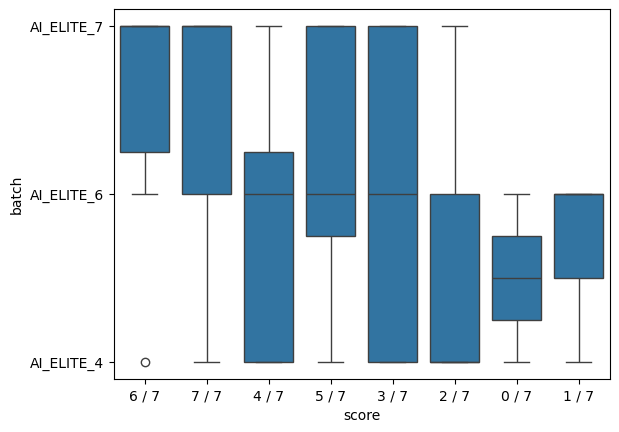

In [114]:
sns.boxplot(data=df,y=df['batch'],x=df['score']);

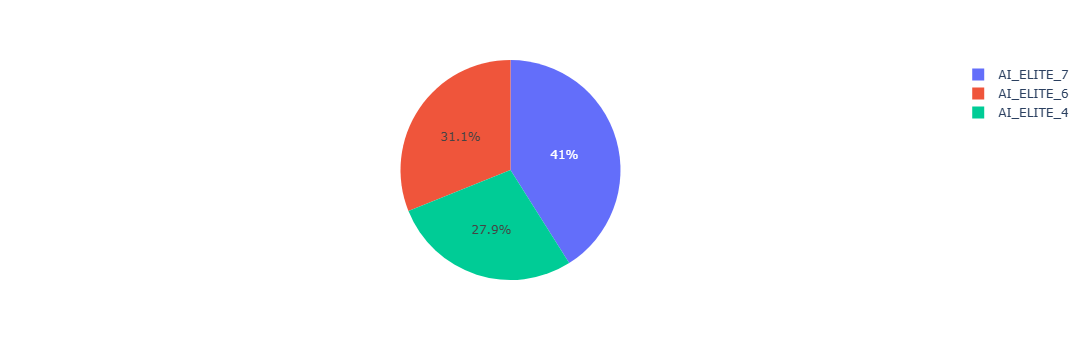

In [115]:
fun=df.groupby(['batch'])['score_num'].agg(sum)
px.pie(data_frame=df,names=fun.index,values=fun.values)

**AI_ELITE_7 batch performs best based on scores.**

**AI_ELITE_4 batch performs best based on scores.**

AI_ELITE_4

> This batvh haslowest average score among all batches.

> Shows more variation in performance levels.

> Indicates need for additional training or support.

AI_ELITE_6

> This batch has  moderate average score.

> Performance is more consistent than AI_ELITE_4.

> Indicates need for consistent  training or support.


AI_ELITE_7

> This batch has the highest average score.

> Shows strong consistency with fewer low scores.

> Indicates need for maintain the performances.
